In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the dataset
data = pd.read_csv("student_data.csv")

# Prepare the data
X = data[['hours_studied', 'attended_review_session']]
y = data['passed_test']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM models with linear and RBF kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Define the parameter grid for grid search for the RBF kernel's gamma
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search with cross-validation for the RBF kernel
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best gamma parameter from the grid search
best_gamma = grid_search.best_params_['gamma']

# Fit the SVM models with the best parameters
svm_linear.fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=best_gamma)
svm_rbf.fit(X_train, y_train)

# Evaluate the models
linear_accuracy = svm_linear.score(X_test, y_test)
rbf_accuracy = svm_rbf.score(X_test, y_test)

print("Linear Kernel SVM Accuracy:", linear_accuracy)
print(f"RBF Kernel SVM Accuracy (with best gamma {best_gamma}):", rbf_accuracy)


KeyError: "None of [Index(['hours_studied', 'attended_review_session'], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the dataset
data = pd.read_csv("student_data.csv")

# Prepare the data
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM models with linear and RBF kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Define the parameter grid for grid search for the RBF kernel's gamma
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search with cross-validation for the RBF kernel
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best gamma parameter from the grid search
best_gamma = grid_search.best_params_['gamma']

# Fit the SVM models with the best parameters
svm_linear.fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=best_gamma)
svm_rbf.fit(X_train, y_train)

# Evaluate the models
linear_accuracy = svm_linear.score(X_test, y_test)
rbf_accuracy = svm_rbf.score(X_test, y_test)

print("Linear Kernel SVM Accuracy:", linear_accuracy)
print(f"RBF Kernel SVM Accuracy (with best gamma {best_gamma}):", rbf_accuracy)


Linear Kernel SVM Accuracy: 0.85
RBF Kernel SVM Accuracy (with best gamma 1): 0.85


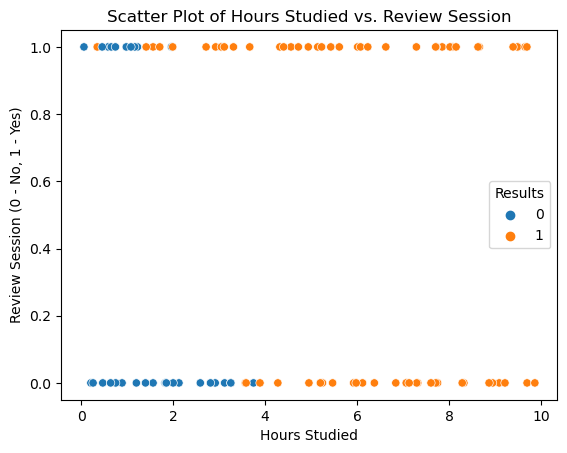

Model Coefficients (weights): [[1.40365599 1.42846816]]
Model Intercept (bias): [-4.58136123]
Accuracy: 0.85
ROC AUC: 0.9642857142857144


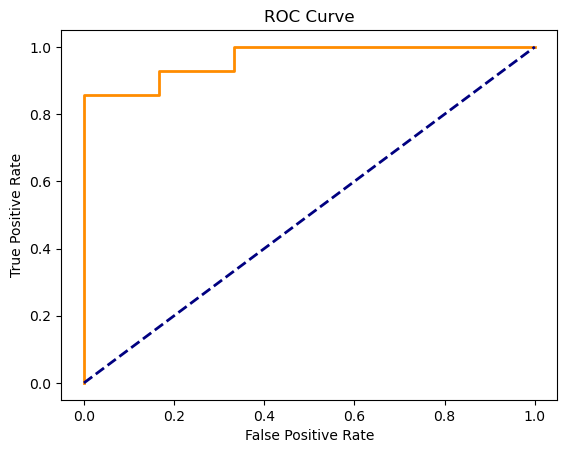

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv("student_data.csv")

# Visualize the data
sns.scatterplot(x='Hours_Studied', y='Review_Session', hue='Results', data=data)
plt.title("Scatter Plot of Hours Studied vs. Review Session")
plt.xlabel("Hours Studied")
plt.ylabel("Review Session (0 - No, 1 - Yes)")
plt.show()

# Prepare the data
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the model coefficients
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print("Model Coefficients (weights):", coefficients)
print("Model Intercept (bias):", intercept)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC
y_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Pass)
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
